<h1><div class="alert alert-block alert-info">
Time Series - Regression Models
</div></h1>

<h1>Linear regression model</h1>

Let's assume that some external factors have influence on your time series x_t in such a way that we can model it using a linear regression model, assuming that the error $\epsilon_t$ is independent and identically distributed according: $N(0, \sigma^2)$

$x_t = c + \beta_0t + \sum_{i=1}^t\delta_i d_{it}+ \sum_{j=1}^k\beta_j z_{jt} + \epsilon_t$

where:

- $c + \beta_0t$: trend

- $\sum_{i=1}^t\delta_i d_{it}$: seasonal effect

- $\sum_{j=1}^k\beta_j z_{jt}$: covariates that represent the variables that add value to explain the time series.

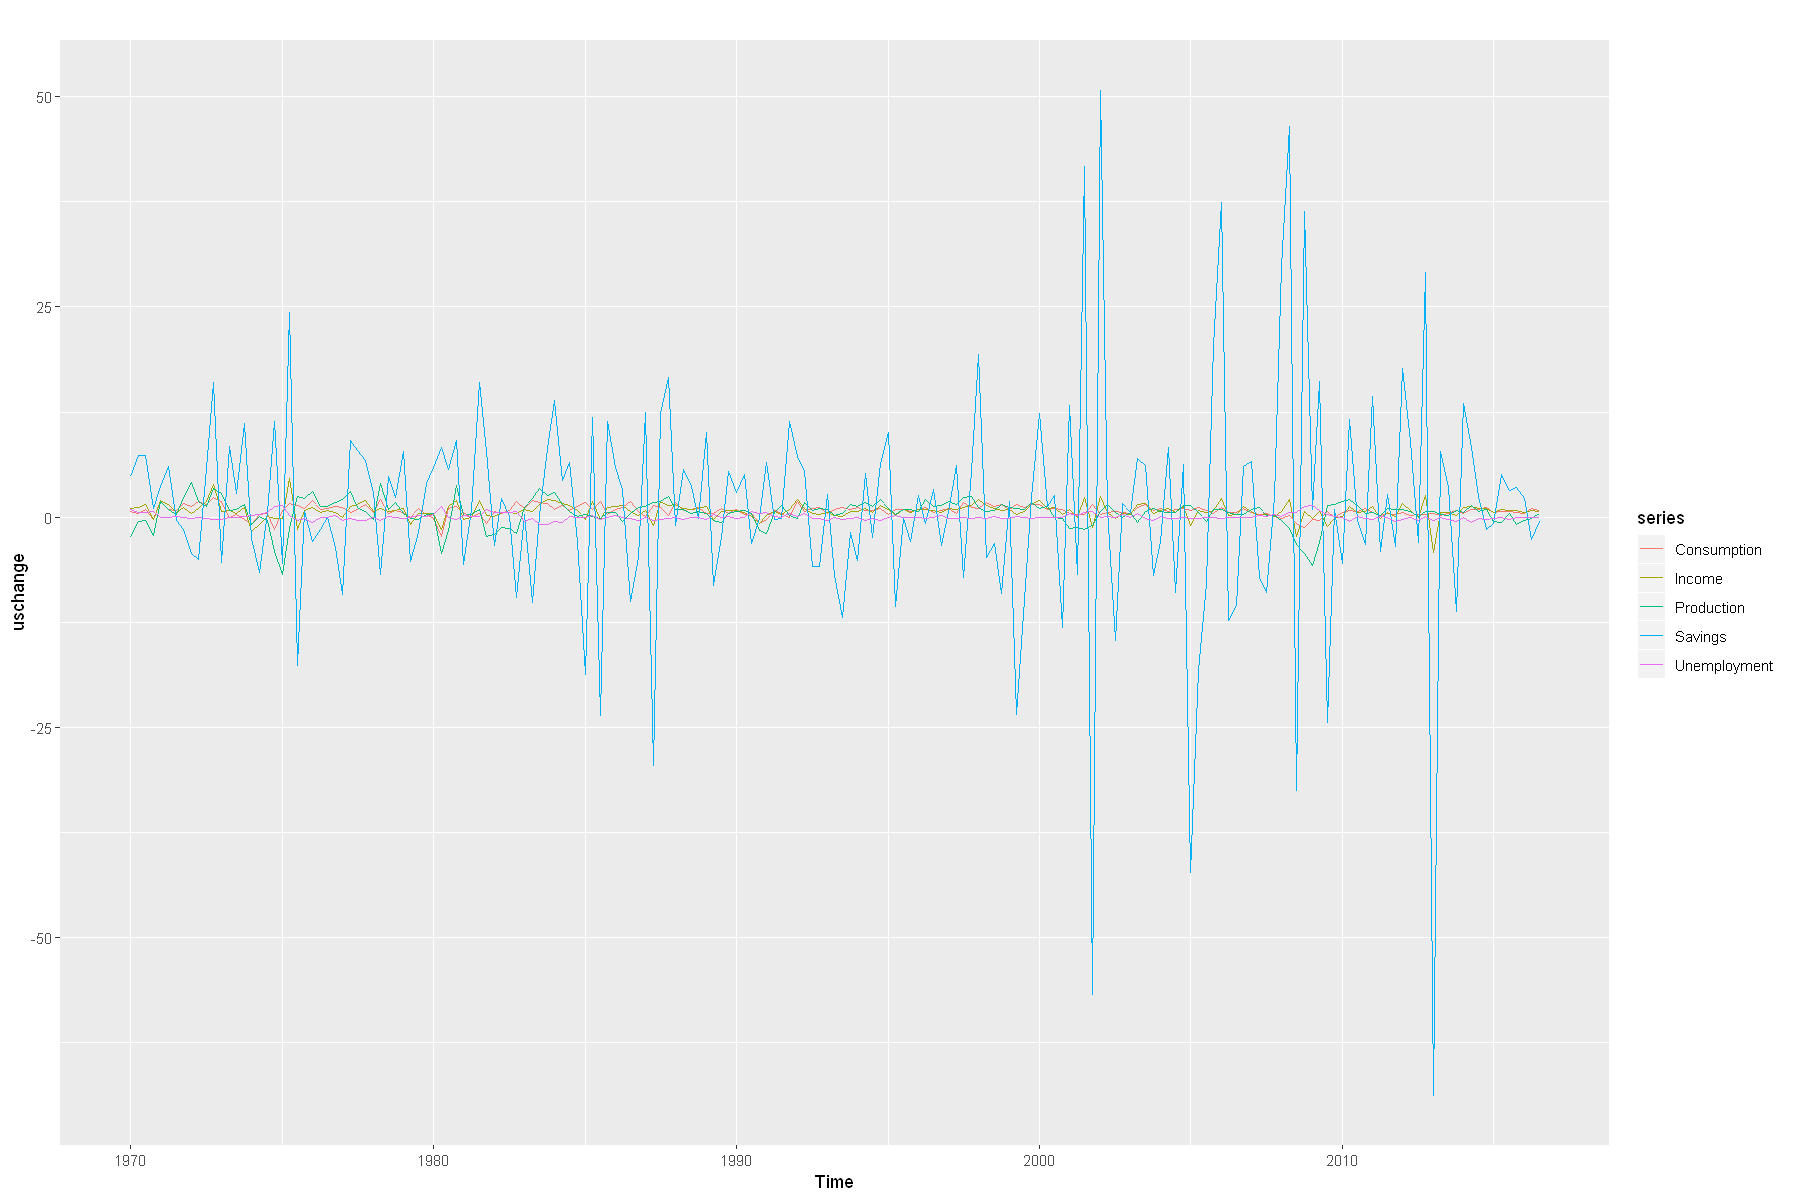

In [2]:
library(fpp2)
options(repr.plot.width=15, repr.plot.height=10)
autoplot(uschange)

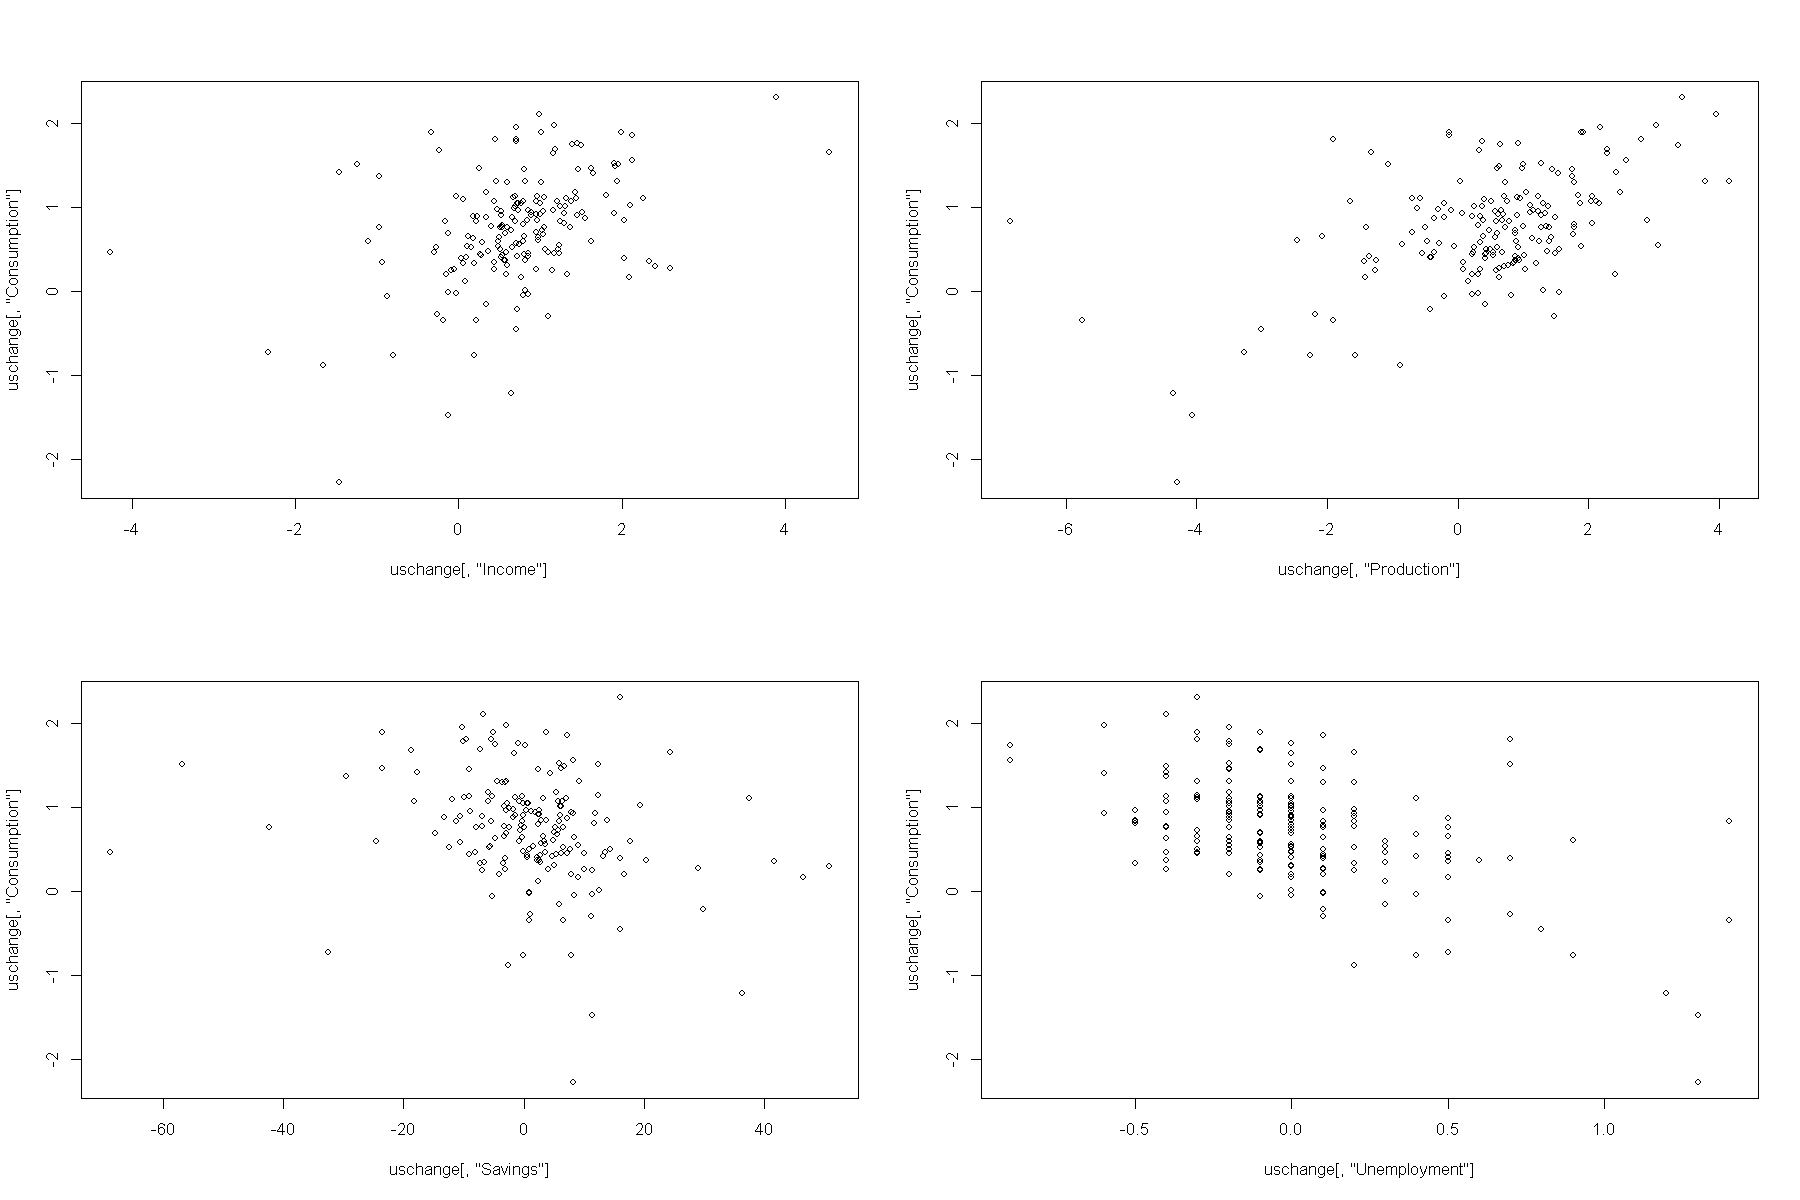

In [33]:
par(mfrow = c(2,2))
plot(uschange[,'Income'], uschange[,'Consumption'])
plot(uschange[,'Production'], uschange[,'Consumption'])
plot(uschange[,'Savings'], uschange[,'Consumption'])
plot(uschange[,'Unemployment'], uschange[,'Consumption'])

By observing the correlation between consumption and the other variables it seems that a linear model would not bring a good fit, but lets see it applying the appropriate statistical methods.

In [25]:
LM_MODEL=tslm(Consumption~Income+Production+Unemployment+Savings+trend+season,data=uschange)
summary(LM_MODEL)


Call:
tslm(formula = Consumption ~ Income + Production + Unemployment + 
    Savings + trend + season, data = uschange)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.88653 -0.15100 -0.00713  0.14232  1.10178 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.4535889  0.0717294   6.324    2e-09 ***
Income        0.7093775  0.0419836  16.897   <2e-16 ***
Production    0.0389018  0.0264104   1.473   0.1425    
Unemployment -0.2396921  0.1096766  -2.185   0.0302 *  
Savings      -0.0450622  0.0027690 -16.274   <2e-16 ***
trend        -0.0010066  0.0004616  -2.181   0.0305 *  
season2      -0.1294052  0.0669461  -1.933   0.0548 .  
season3      -0.0602444  0.0671966  -0.897   0.3712    
season4      -0.1495544  0.0675787  -2.213   0.0282 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.322 on 178 degrees of freedom
Multiple R-squared:  0.769,	Adjusted R-squared:  0.7586 
F-statistic: 74.06

There p-values of Production suggest that the variable does not help to model the consumption, let's remove it and play it again.

In [29]:
LM_MODEL=tslm(Consumption~Income+Unemployment+Savings+trend+season,data=uschange)
summary(LM_MODEL)


Call:
tslm(formula = Consumption ~ Income + Unemployment + Savings + 
    trend + season, data = uschange)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.85708 -0.15452 -0.00742  0.15135  1.13327 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.4795567  0.0697559   6.875 9.97e-11 ***
Income        0.7195019  0.0415522  17.316  < 2e-16 ***
Unemployment -0.3614435  0.0723238  -4.998 1.37e-06 ***
Savings      -0.0455217  0.0027604 -16.491  < 2e-16 ***
trend        -0.0011763  0.0004484  -2.623  0.00946 ** 
season2      -0.1230150  0.0670233  -1.835  0.06810 .  
season3      -0.0614825  0.0674105  -0.912  0.36296    
season4      -0.1387327  0.0673973  -2.058  0.04100 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.323 on 179 degrees of freedom
Multiple R-squared:  0.7662,	Adjusted R-squared:  0.757 
F-statistic: 83.78 on 7 and 179 DF,  p-value: < 2.2e-16



	Ljung-Box test

data:  Residuals from Linear regression model
Q* = 16.322, df = 3, p-value = 0.0009738

Model df: 8.   Total lags used: 11



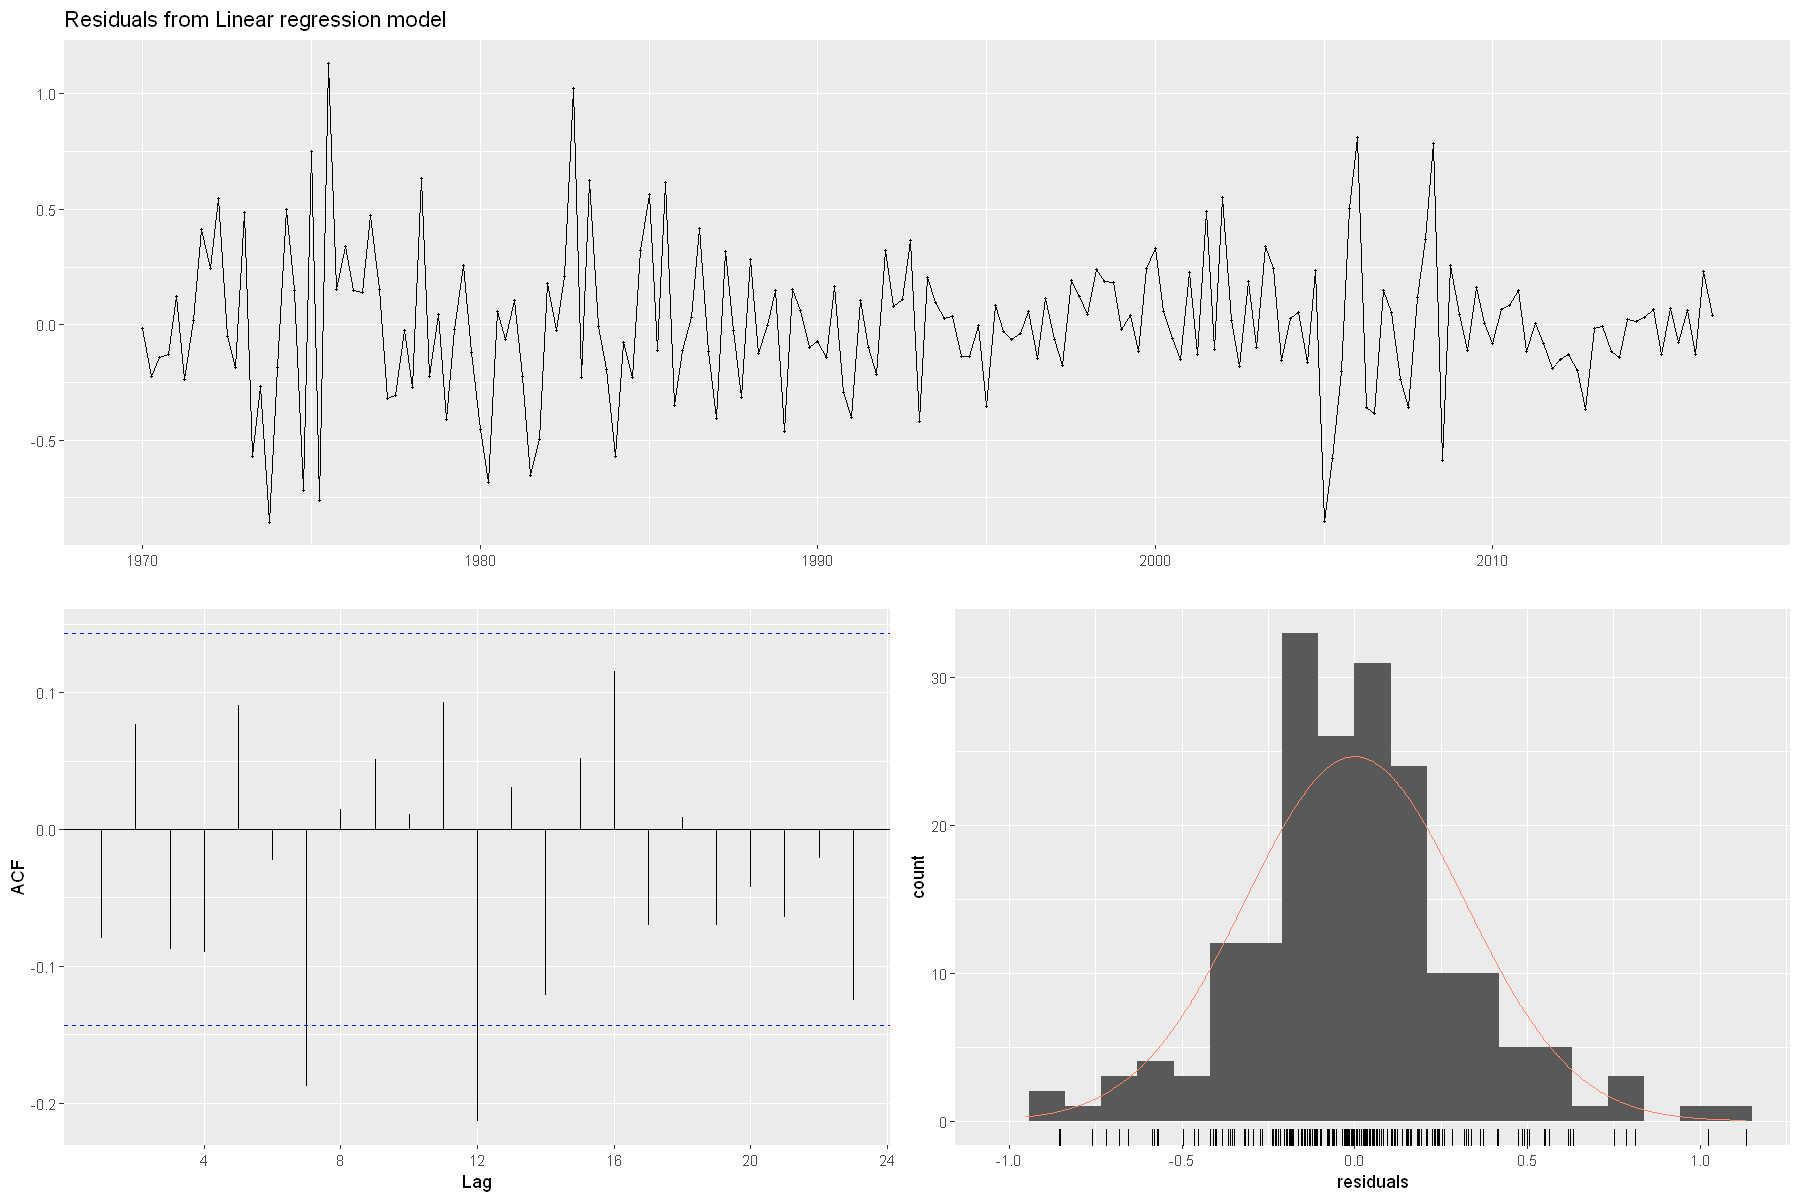

In [31]:
checkresiduals(LM_MODEL,test='LB',plot=TRUE)

<b>Conclusion: </b>Here the residual are correlated, which means that this regression model (which assumes independent residuals) is not appropriated.

<hr><hr>
<h1>Dynamic regression model</h1>

Dynamic regression model modelizes the residuals with an $ARIMA_{p,d,q}$ model

In [40]:
DR_MODEL=Arima(uschange[,'Consumption'],xreg=uschange[,'Income'],order=c(1,0,2), seasonal=c(1,0,1))
summary(DR_MODEL)

Series: uschange[, "Consumption"] 
Regression with ARIMA(1,0,2)(1,0,1)[4] errors 

Coefficients:
         ar1      ma1     ma2    sar1     sma1  intercept    xreg
      0.7565  -0.6388  0.1957  0.4331  -0.5289     0.6033  0.1978
s.e.  0.0988   0.1190  0.0774  0.3271   0.3018     0.0839  0.0463

sigma^2 estimated as 0.3225:  log likelihood=-156.11
AIC=328.21   AICc=329.02   BIC=354.06

Training set error measures:
                      ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.001406601 0.5571218 0.4143695 37.77158 171.2172 0.6492324
                    ACF1
Training set 0.009984025



	Ljung-Box test

data:  Residuals from Regression with ARIMA(1,0,2)(1,0,1)[4] errors
Q* = 3.5666, df = 3, p-value = 0.3122

Model df: 7.   Total lags used: 10



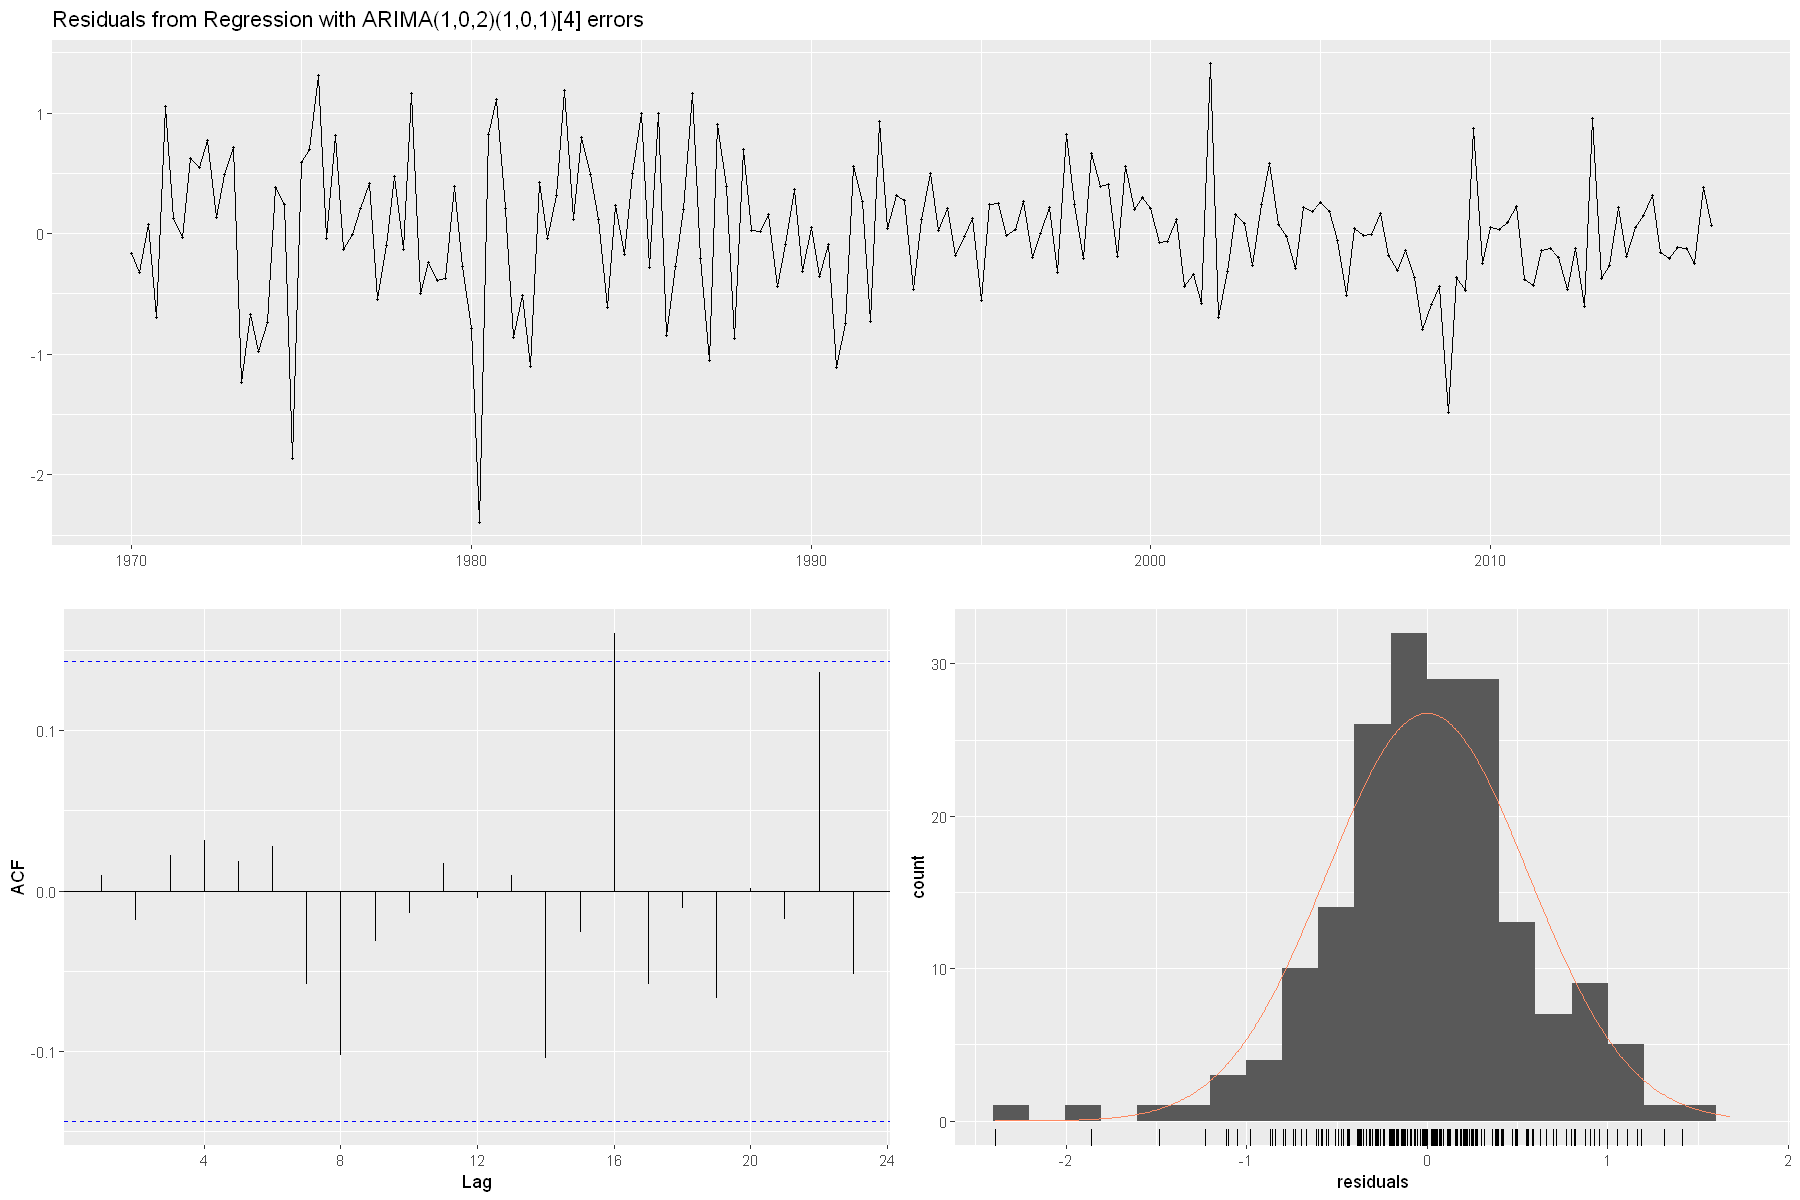

In [41]:
checkresiduals(DR_MODEL,test='LB',plot=TRUE)

With the result of the test we can detect that the residuals are white noise, and we have a good model to forecast.

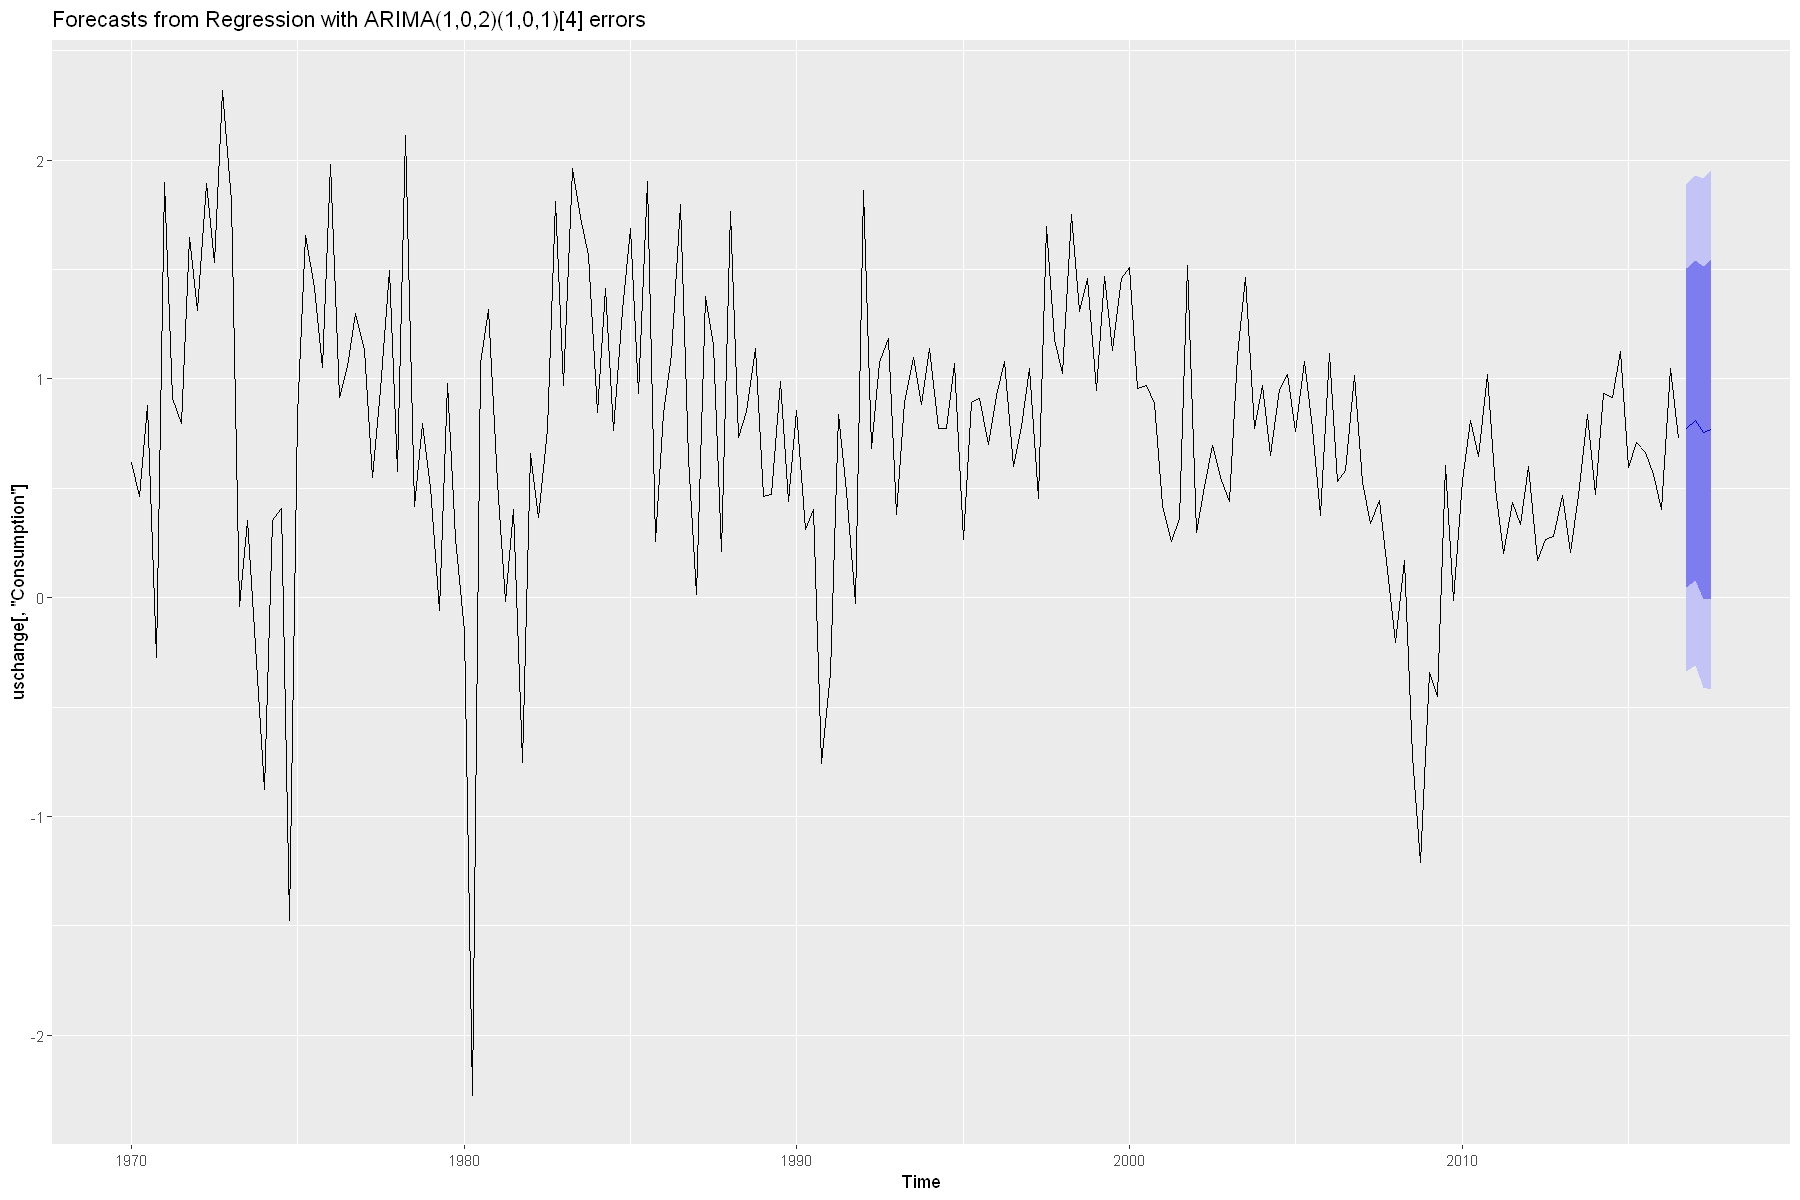

In [42]:
autoplot(forecast(DR_MODEL,xreg=rep(mean(uschange[,'Income']),4)))